In [31]:
import pandas as pd
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [32]:
data = pd.read_pickle('./data/master_dataset_24112019.pkl')

In [33]:
data  = data[(data.dk2 < 600) & (data.dk2 > -10)]
data = data.dropna(how='any', axis=0)

In [34]:
y = data['dk2']
x = data.drop('dk2', axis=1)

In [35]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_sc = x_scaler.fit_transform(x)
y_sc = y_scaler.fit_transform(np.array(y).reshape(-1, 1))

In [41]:
x_sc = x_sc*100
y_sc = y_sc*100

In [42]:
lasso = Lasso()
lasso.fit(x_sc,y_sc)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
x.columns

Index(['de', 'dk1', 'no2', 'se3', 'se4', 'system', 'CentralProd_dk1',
       'ElectricBoilerCon_dk1', 'ExchangeContinent_dk1',
       'ExchangeGreatBelt_dk1', 'ExchangeNordicCountries_dk1', 'GrossCon_dk1',
       'LocalPowerProd_dk1', 'NetCon_dk1', 'OnshoreWindPower_dk1',
       'SolarPowerProd_dk1', 'CentralProd_dk2', 'ElectricBoilerCon_dk2',
       'ExchangeContinent_dk2', 'ExchangeNordicCountries_dk2', 'GrossCon_dk2',
       'LocalPowerProd_dk2', 'NetCon_dk2', 'OnshoreWindPower_dk2',
       'SolarPowerProd_dk2', 'sun', 'temp', 'wind', 'hour', 'weekday',
       'Offshore_dk1', 'Offshore_dk2'],
      dtype='object')

In [44]:
lasso.coef_

array([ 0.24966344,  0.07585441, -0.04817314, -0.07726474,  0.60381025,
        0.13800862,  0.0731073 , -0.01643   ,  0.07433434,  0.05624076,
        0.09059043, -0.09451814,  0.1184114 ,  0.12635249, -0.01888646,
        0.00929651, -0.0838231 , -0.00524629, -0.03801528, -0.09719459,
       -0.        ,  0.03107441, -0.04686039, -0.00720097,  0.01160224,
        0.0088917 ,  0.11997243, -0.01482503,  0.01925685,  0.01713741,
        0.05608772, -0.06392751])

In [45]:
lasso_dict = {}
for t in zip(x.columns, lasso.coef_):
    lasso_dict[t[0]] = t[1]

In [46]:
df = pd.DataFrame.from_dict(lasso_dict, orient='index')
df.columns = ['lasso_score']

In [47]:
def sign(x):
    if x > 0 :
        return '+'
    if x < 0 :
        return '-'
    else:
        return '0'

In [48]:
df['sign'] = df.lasso_score.apply(lambda x: sign(x))

In [49]:
df.lasso_score = df.lasso_score.apply(lambda x: np.abs(x))

In [50]:
df.sort_values('lasso_score', ascending=False)

,lasso_score,sign
se4,0.603810,+
de,0.249663,+
system,0.138009,+
NetCon_dk1,0.126352,+
temp,0.119972,+
LocalPowerProd_dk1,0.118411,+
ExchangeNordicCountries_dk2,0.097195,-
GrossCon_dk1,0.094518,-
ExchangeNordicCountries_dk1,0.090590,+
CentralProd_dk2,0.083823,-


In [51]:
data['dk2_24'] = data.dk2.shift(-24)

In [52]:
lag_data = data.dropna(how='any', axis=0)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

y = lag_data['dk2_24']
x = lag_data.drop(['dk2_24'], axis=1)

In [54]:
x_sc = x_scaler.fit_transform(x) * 100
y_sc = y_scaler.fit_transform(np.array(y).reshape(-1, 1)) * 100

In [55]:
lasso2 = Lasso()
lasso2.fit(x,y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
x.columns

Index(['de', 'dk1', 'dk2', 'no2', 'se3', 'se4', 'system', 'CentralProd_dk1',
       'ElectricBoilerCon_dk1', 'ExchangeContinent_dk1',
       'ExchangeGreatBelt_dk1', 'ExchangeNordicCountries_dk1', 'GrossCon_dk1',
       'LocalPowerProd_dk1', 'NetCon_dk1', 'OnshoreWindPower_dk1',
       'SolarPowerProd_dk1', 'CentralProd_dk2', 'ElectricBoilerCon_dk2',
       'ExchangeContinent_dk2', 'ExchangeNordicCountries_dk2', 'GrossCon_dk2',
       'LocalPowerProd_dk2', 'NetCon_dk2', 'OnshoreWindPower_dk2',
       'SolarPowerProd_dk2', 'sun', 'temp', 'wind', 'hour', 'weekday',
       'Offshore_dk1', 'Offshore_dk2'],
      dtype='object')

In [57]:
lasso2.coef_

array([ 4.54537447e-02, -3.29013645e-03,  3.79201284e-01,  6.10923122e-02,
        4.10344607e-02,  3.12343823e-02,  3.29597073e-01, -3.77933746e-03,
       -0.00000000e+00,  5.75795418e-03,  0.00000000e+00,  2.29141726e-03,
       -5.99225146e-02, -0.00000000e+00,  4.85102334e-02, -0.00000000e+00,
        0.00000000e+00, -2.04308767e-02,  1.89645727e+00,  4.17079737e-01,
       -1.64083097e-03, -1.15206922e-02, -0.00000000e+00,  5.14052949e-02,
        0.00000000e+00,  0.00000000e+00,  1.28441804e-01,  6.03779791e-01,
        3.77047558e-01,  2.17650925e-01, -1.47291802e-01, -5.33221879e-03,
        5.45369594e-02])

In [58]:
lasso_dict = {}
for t in zip(x.columns, lasso2.coef_):
    lasso_dict[t[0]] = t[1]

In [59]:
df = pd.DataFrame.from_dict(lasso_dict, orient='index')
df.columns = ['lasso_score']

In [60]:
df['sign'] = df.lasso_score.apply(lambda x: sign(x))

In [61]:
df.lasso_score = df.lasso_score.apply(lambda x: np.abs(x))

In [62]:
df.sort_values('lasso_score', ascending=False)

,lasso_score,sign
ElectricBoilerCon_dk2,1.896457,+
temp,0.603780,+
ExchangeContinent_dk2,0.417080,+
dk2,0.379201,+
wind,0.377048,+
system,0.329597,+
hour,0.217651,+
weekday,0.147292,-
sun,0.128442,+
no2,0.061092,+


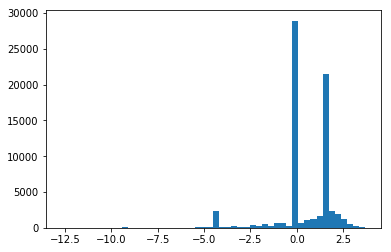

In [93]:
plt.hist(data['ElectricBoilerCon_dk2'], bins=50)
plt.show()

In [94]:
lag_data['electricboiler_squared'] = lag_data['ElectricBoilerCon_dk2']**2
lag_data['electricboiler_cubed'] = lag_data['ElectricBoilerCon_dk2']**3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
lag_data2014 = lag_data[lag_data.index.year > 2013]

In [96]:
x = lag_data2014[['ElectricBoilerCon_dk2']]
y = lag_data2014['dk2_24']

In [97]:
lasso3 = Lasso()
lasso3.fit(x,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

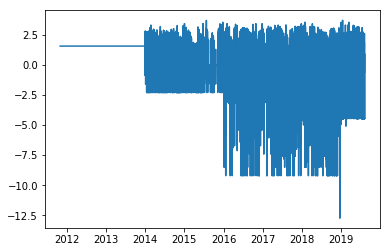

In [98]:
plt.plot(lag_data['ElectricBoilerCon_dk2'])

In [99]:
lasso3.coef_

array([-15.43758169])

In [100]:
print(np.percentile(y, 5) , np.percentile(y, 95))

92.45 429.67


In [101]:
def convert_to_price_bin(x):
    if x <= 92.45:
        return 0
    if x >= 429.67:
        return 2
    else:
        return 1

In [102]:
lag_data['extreme_bin'] = lag_data['dk2_24'].apply(lambda x: convert_to_price_bin(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
x = lag_data.drop(['dk2_24', 'extreme_bin'], axis=1)
y = lag_data['extreme_bin']

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components=2)

In [106]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [107]:
print(pca.explained_variance_ratio_)

[0.54534646 0.23485648]


In [108]:
pca_data = pca.transform(x)
pca_df = pd.DataFrame(pca_data, index=lag_data.index)

In [109]:
pca_df = pd.concat([pca_df, y], axis=1)

In [110]:
pca_0 = pca_df[pca_df.extreme_bin == 0]
pca_1 = pca_df[pca_df.extreme_bin == 1]
pca_2 = pca_df[pca_df.extreme_bin == 2]

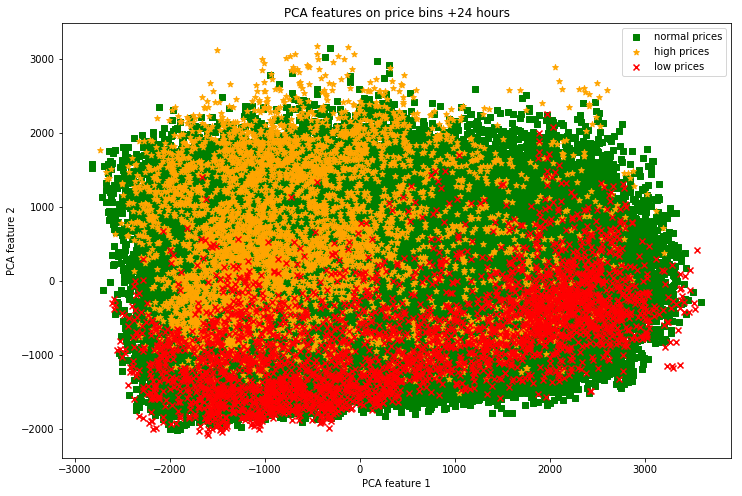

In [111]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_1[0], pca_1[1], color='green', marker=',', label='normal prices')
plt.scatter(pca_2[0], pca_2[1], color='orange', marker='*', label='high prices')
plt.scatter(pca_0[0], pca_0[1], color='red', marker='x', label='low prices')
plt.title('PCA features on price bins +24 hours')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.legend()
#plt.show()
plt.savefig('./data/pca_+24.png')

In [112]:
data['extreme_bin'] = data['dk2'].apply(lambda x: convert_to_price_bin(x))

In [113]:
data = data.dropna(how='any', axis=0)

In [114]:
x = data.drop(['extreme_bin', 'dk2'], axis=1)
y = data['extreme_bin']

In [115]:
pca2 = PCA(n_components=2)

In [116]:
pca2.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [117]:
pca_data = pca2.transform(x)
pca_df = pd.DataFrame(pca_data, index=lag_data.index)

In [118]:
pca_df = pd.concat([pca_df, y], axis=1)

In [119]:
pca_0 = pca_df[pca_df.extreme_bin == 0]
pca_1 = pca_df[pca_df.extreme_bin == 1]
pca_2 = pca_df[pca_df.extreme_bin == 2]

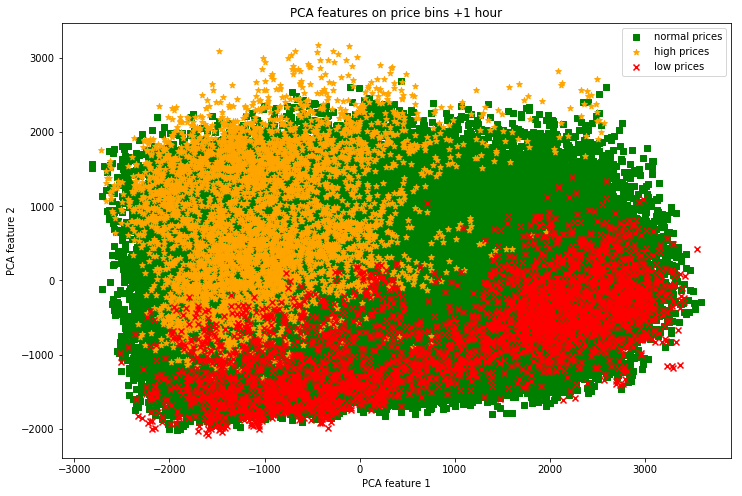

In [120]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_1[0], pca_1[1], color='green', marker=',', label='normal prices')
plt.scatter(pca_2[0], pca_2[1], color='orange', marker='*', label='high prices')
plt.scatter(pca_0[0], pca_0[1], color='red', marker='x', label='low prices')
plt.title('PCA features on price bins +1 hour')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.legend()
#plt.show()
plt.savefig('./data/pca_static.png')

## 48 hours


In [121]:
lag48_data = data.dropna(how='any', axis=0)
lag48_data = lag48_data.drop(['dk2_24', 'extreme_bin'], axis=1)

In [122]:
lag48_data['dk2_48'] = lag48_data.dk2.shift(-48)

In [123]:
lag48_data.dropna(how='any', axis=0, inplace=True)

In [124]:
lag48_data['extreme_bin'] = lag48_data['dk2_48'].apply(lambda x: convert_to_price_bin(x))

In [125]:
x = lag48_data.drop(['dk2_48', 'extreme_bin'], axis=1)
y = lag48_data['extreme_bin']

In [126]:
pca3 = PCA(n_components=2)

In [127]:
pca3.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [128]:
pca_data = pca3.transform(x)
pca_df = pd.DataFrame(pca_data, index=lag48_data.index)

In [129]:
pca_df = pd.concat([pca_df, y], axis=1)

In [130]:
pca_0 = pca_df[pca_df.extreme_bin == 0]
pca_1 = pca_df[pca_df.extreme_bin == 1]
pca_2 = pca_df[pca_df.extreme_bin == 2]

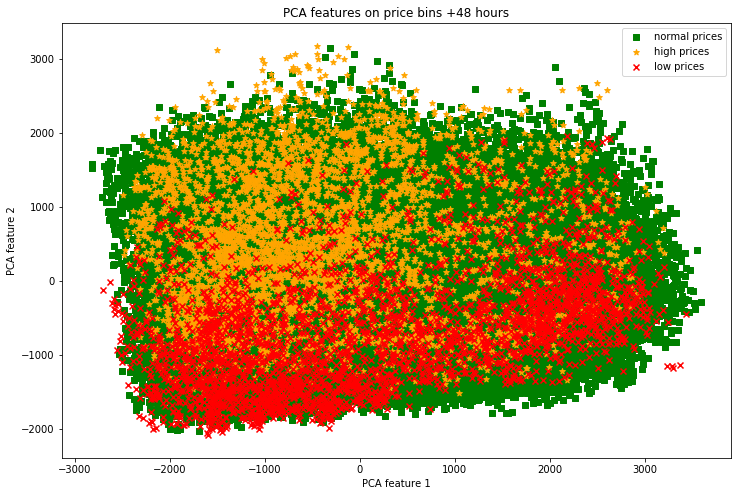

In [131]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_1[0], pca_1[1], color='green', marker=',', label='normal prices')
plt.scatter(pca_2[0], pca_2[1], color='orange', marker='*', label='high prices')
plt.scatter(pca_0[0], pca_0[1], color='red', marker='x', label='low prices')
plt.title('PCA features on price bins +48 hours')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.legend()
#plt.show()
plt.savefig('./data/pca_static+48.png')